In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import sobol_seq as ss
%matplotlib inline
from collections import OrderedDict

## Figure xx


In [123]:
N = 64 # Number points
p = 2 # Number of dimensions

In [124]:
sequences = OrderedDict()

sobol_seq = ss.i4_sobol_generate(dim_num=p, n=1000)[-N:]

random_seq = np.random.random((N, p))

grid_seq = [np.linspace(0, 1, int(np.power(N, 1.0/p)))[:, np.newaxis] for _ in range(p)]
grid_seq = np.meshgrid(*grid_seq)
# grid_seq[0].shape

sequences['Grid'] = [x.flatten() for x in grid_seq]
sequences['Sobol Sequence'] = sobol_seq.T
sequences['Random Sequence'] = random_seq.T


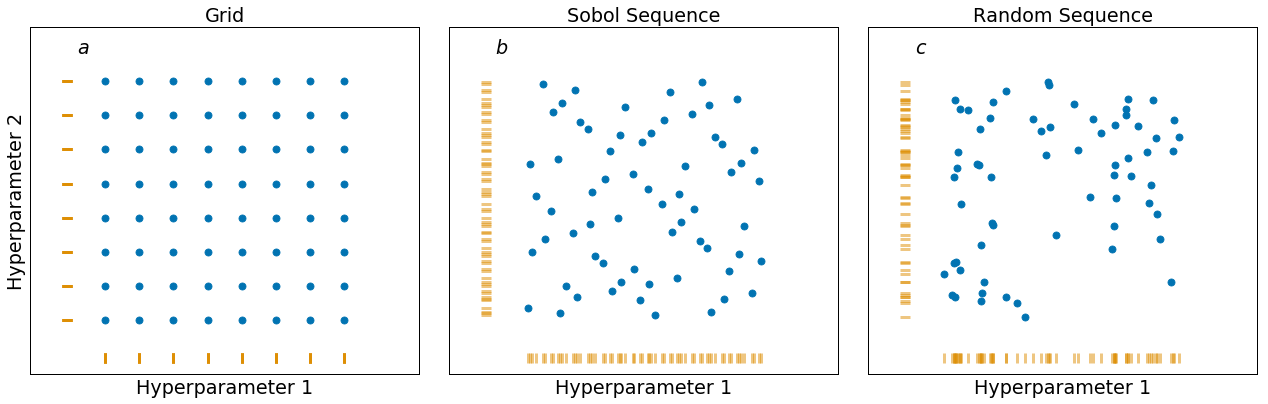

In [125]:
with sns.plotting_context('paper', font_scale=2):
    d = 0.4
    text_d = d*0.3
    rug_d = d*0.4
    cols = sns.color_palette('colorblind')
    fig, axes = plt.subplots(1,len(sequences), sharex=True, sharey=True, figsize=(18,6))
    for i, (k,v) in enumerate(sequences.items()):
        axes[i].scatter(v[0], v[1], label=k, s=50, color=cols[0])
        axes[i].scatter(np.ones_like(v[0])*(-rug_d), v[1], marker='_', s=100, lw=3, alpha=0.5, color=cols[1])
        axes[i].scatter(v[0], np.ones_like(v[1])*(-rug_d), marker='|', s=100, lw=3, alpha=0.5, color=cols[1])
        axes[i].set_ylim(0-d,1+d)
        axes[i].set_xlim(0-d,1+d)
        axes[i].set_xlabel('Hyperparameter 1')
        if i ==0: axes[i].set_ylabel('Hyperparameter 2')
        axes[i].tick_params(axis='both', bottom=False, left=False, top=False, right=False,
                          labelbottom=False, labelleft=False, labeltop=False, labelright=False)
        axes[i].text(-text_d, 1+text_d, list('abc')[i], style='italic',
        bbox={'facecolor': 'white', 'alpha': 0.5, 'pad': 5, 'edgecolor': 'white'})
        axes[i].set_title(k)
        axes[i].set_aspect('equal')


    plt.tight_layout()
    plt.savefig('figures/grid_sobol_rand.png')